In [2]:
# all imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textblob

%matplotlib inline
print("Setup complete")

Setup complete


In [3]:
df = pd.read_csv("../dataset.csv", index_col="id")
df.head()

,date,likes,content,username,media,inferred company
id,,,,,,
1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


# Steps to follow
1) Data Cleaning
2) Data Visualisation 
3) Feature Engineering

- # Data Cleaning

In [4]:
df.isnull().sum()

date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

- # Data Visualisation

<Axes: xlabel='id', ylabel='likes'>

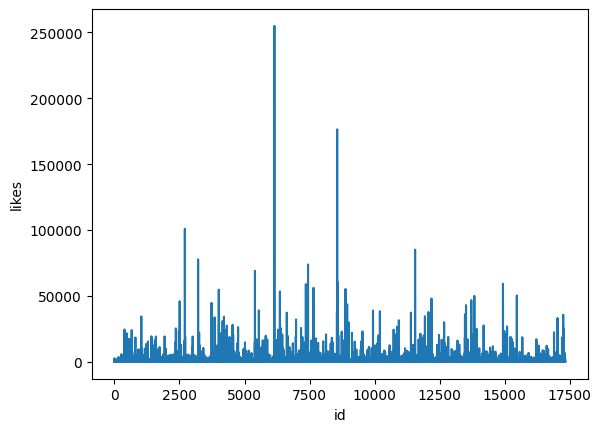

In [6]:
# just get an idea of maximum and minimum likes
sns.lineplot(data=df, x="id", y="likes")

<Axes: xlabel='weekday', ylabel='count'>

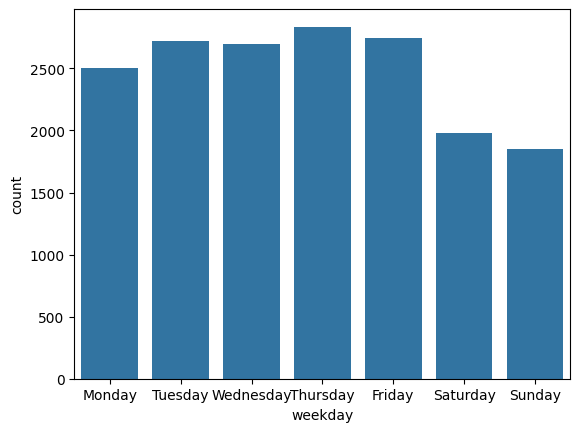

In [29]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = pd.Categorical(pd.to_datetime(df["date"]).dt.day_name(), categories=weekday_order, ordered=True)

# number of tweets per weekday
sns.countplot(data=df, x="weekday")

C:\Users\Neelesh Mishra\AppData\Local\Temp\ipykernel_19816\3952850424.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=pd.DataFrame(df.groupby("weekday")["likes"].mean()), x="weekday", y="likes")


<Axes: xlabel='weekday', ylabel='likes'>

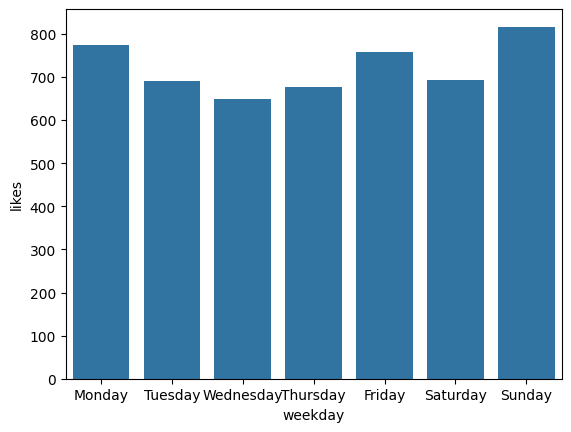

In [30]:
# average likes per weekday
sns.barplot(data=pd.DataFrame(df.groupby("weekday")["likes"].mean()), x="weekday", y="likes")

<Axes: xlabel='media_type', ylabel='likes'>

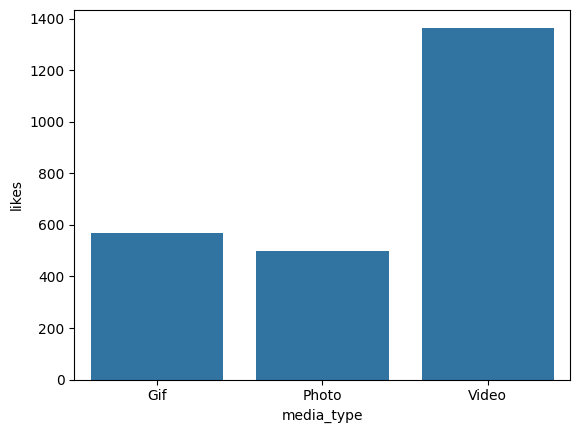

In [9]:
df["media_type"] = df["media"].apply(lambda x: "Photo" if 'Photo' in x else "Gif" if 'Gif' in x else "Video")

# average likes per media type
sns.barplot(data=pd.DataFrame(df.groupby("media_type")["likes"].mean()), x="media_type", y="likes")

In [10]:
# sentiment analysis
df['content'] = df['content'].apply(lambda x: textblob.TextBlob(x))
df["text_polarity"] = df["content"].apply(lambda x: x.sentiment.polarity)
df["text_subjectivity"] = df["content"].apply(lambda x: x.sentiment.subjectivity)

<Axes: xlabel='text_polarity', ylabel='likes'>

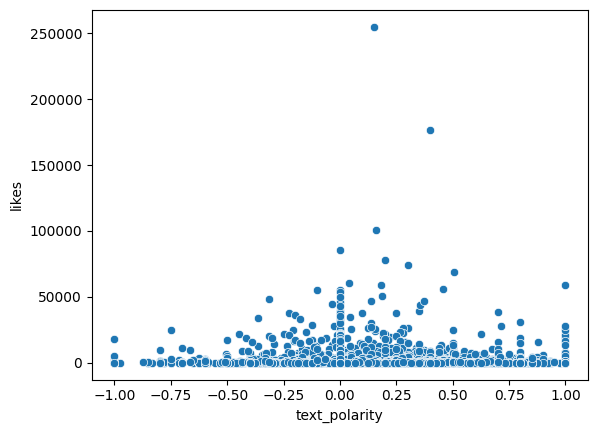

In [11]:
# scatter plot of text polarity vs likes
sns.scatterplot(data=df, x="text_polarity", y="likes")

<Axes: xlabel='text_subjectivity', ylabel='likes'>

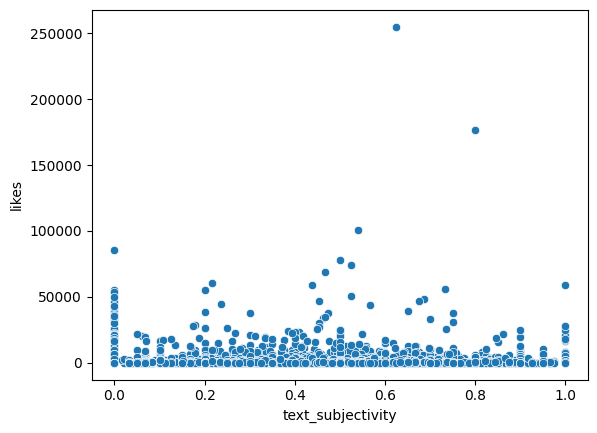

In [12]:

# scatter plot of text subjectivity vs likes
sns.scatterplot(data=df, x="text_subjectivity", y="likes")

In [14]:
df['word_count'] = df['content'].apply(lambda x: len(x.words))
df['char_count'] = df['content'].apply(lambda x: len(x.raw))

<Axes: xlabel='word_count', ylabel='likes'>

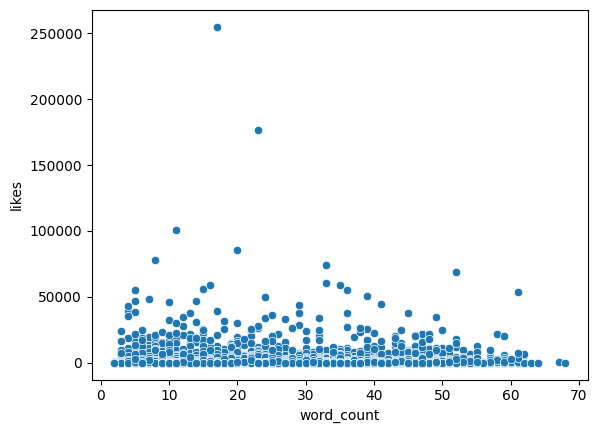

In [45]:
sns.scatterplot(data=df, x="word_count", y="likes")

<Axes: xlabel='char_count', ylabel='likes'>

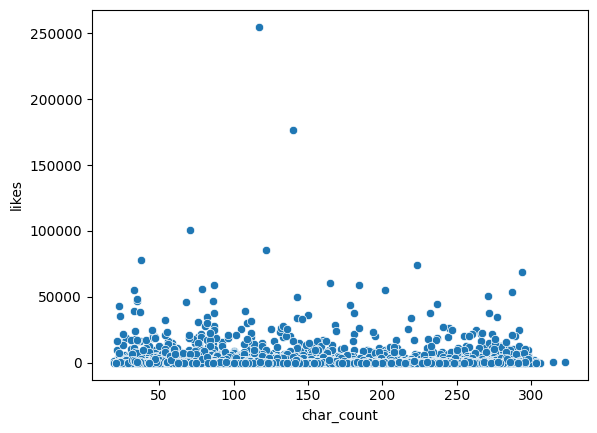

In [43]:
sns.scatterplot(data=df, x="char_count", y="likes")

<Axes: xlabel='char_density', ylabel='likes'>

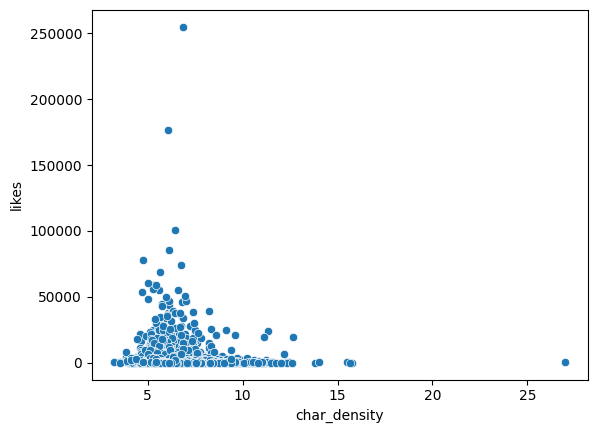

In [58]:
df['char_density'] = df['char_count'] / df['word_count']
sns.scatterplot(data=df, x="char_density", y="likes")

<Axes: xlabel='post_hour', ylabel='likes'>

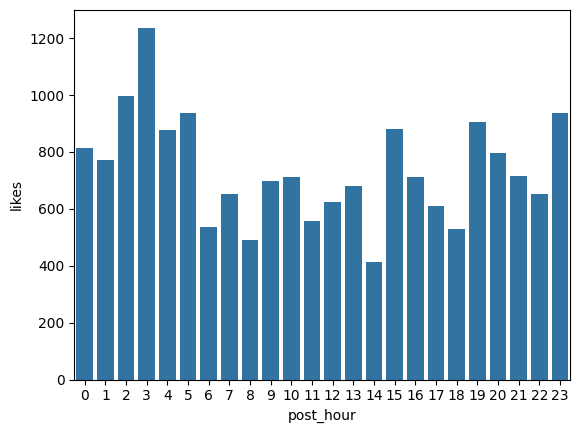

In [ ]:
df["post_hour"] = pd.to_datetime(df["date"]).dt.hour

# average likes per hour of the day
sns.barplot(data=pd.DataFrame(df.groupby("post_hour")["likes"].mean()), x="post_hour", y="likes")

C:\Users\Neelesh Mishra\AppData\Local\Temp\ipykernel_19816\2831005660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["weekday", "post_hour"])["likes"].mean().unstack(),


<Axes: xlabel='post_hour', ylabel='weekday'>

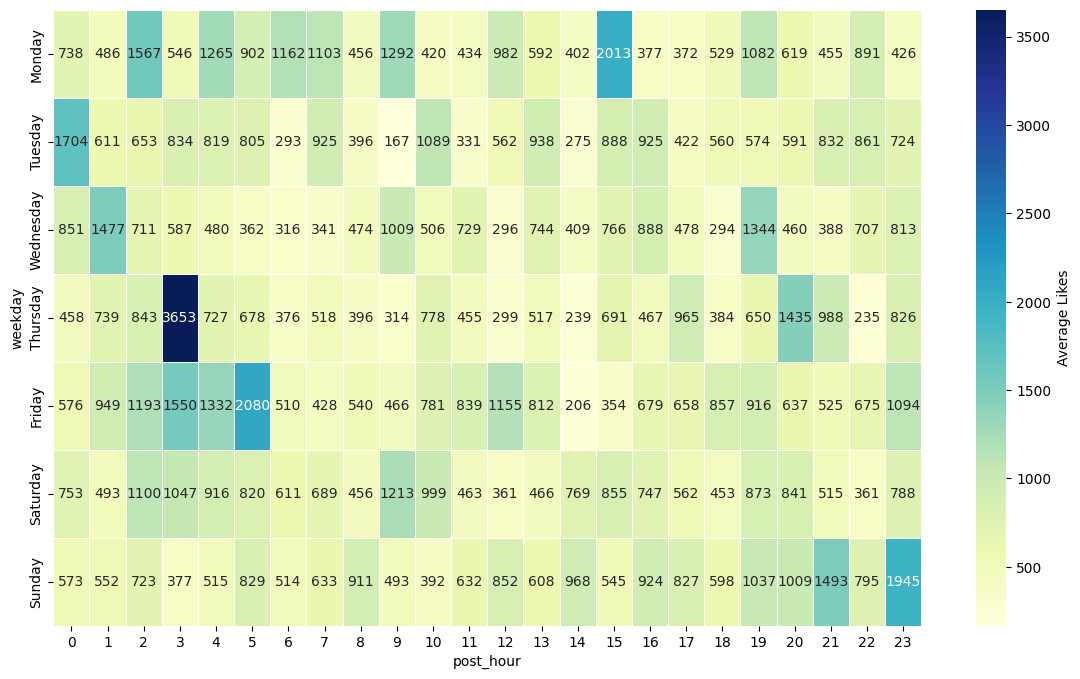

In [31]:
# make heatmap with likes per weekday and hour
plt.figure(figsize=(14, 8))
sns.heatmap(
    df.groupby(["weekday", "post_hour"])["likes"].mean().unstack(),
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Average Likes"},
)

<Axes: xlabel='inferred company', ylabel='likes'>

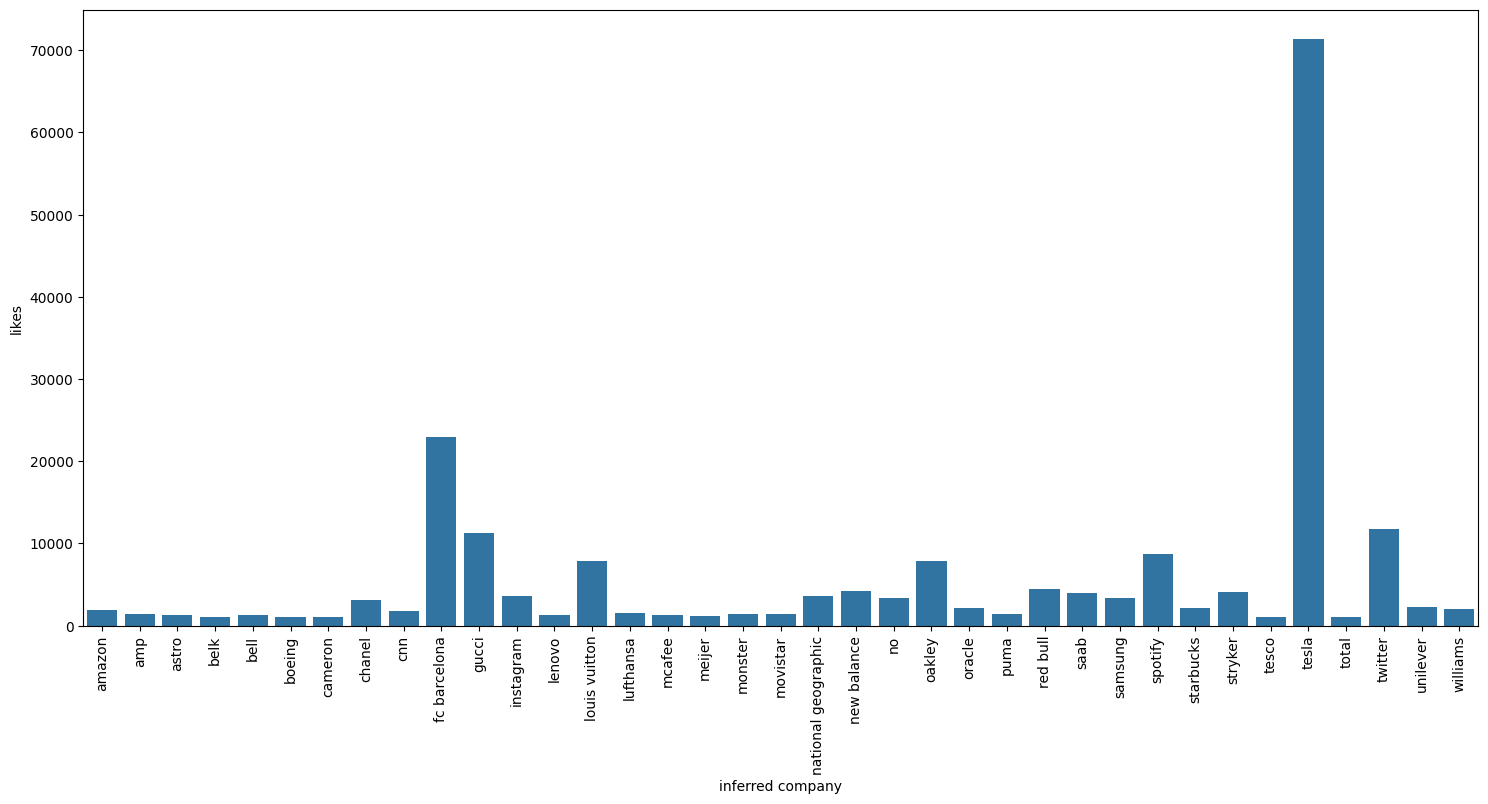

In [57]:
# make x axis text vertical
plt.figure(figsize=(18, 8))
plt.xticks(rotation=90)

company_tweets_df = df.groupby("inferred company")['likes'].mean()

# drop rows with less than 100 likes
company_tweets_df = company_tweets_df[company_tweets_df > 1000]

sns.barplot(data=company_tweets_df.reset_index(), x="inferred company", y="likes")

## Conclusion
### 1) Content Performance Patterns:
- Extremely long-tail distribution of engagement: most posts get minimal interaction while a few achieve viral status
- Clearly, videos outperform other types of media i.e. photos and GIFs.
- Sweet spot for content length appears to be 10-25 words, with diminishing returns before and beyond that
- Tweets with character density of around 5-7 characters per word perform better than extremes

### 2) Temporal Insights:
- Strong weekly patterns: Thursday peaks as the highest engagement day, while weekends (Saturday/Sunday) show lower activity of posting
- High likes for tweets posted on Sunday can be utilised more
- Hourly patterns reveal two distinct peaks: morning (2-4 AM) and evening (22-23 hours), suggesting different audience segments
- The heatmap shows some hours of Monday, Thursday and Friday as particularly high-engagement time slots

### 3) Content Quality Indicators:
- Moderate positive sentiment (0.0-0.4 range) tends to perform better than extreme sentiment
- Both highly objective and highly subjective content can perform well, but moderately subjective content struggles

### 4) Brand/Source Analysis:
- Tesla dominates engagement by a massive margin (~72k likes), followed by Barcelona (~23k)
- Most brands cluster in the low engagement range, indicating either niche audiences or content quality differences


# Feature Engineering
The final features after data processing that I am going to use are:
- Weekday (after cyclical time feature extraction)
- Hour (after cyclical time feature extraction)
- Text sentiment polarity
- Text subjectivity
- 0 or 1 value if company present in high performing companies
- Word count
- Character density
- One hot encoded media type

# API input/output structure
- Python backend using Flask
- Form POST request endpoint for frontend
- Data processing in the backend
- Input consisting of hour, weekday, text content, company associated and media type
- Output would consist of predicted number of likes and better text generation using Generative AI tools
- Frontend using Streamlit or React - completely separate from the backend